<img src=" bienes raices.jpg">

<h1 Style= 'color:#E9967A;text-align:center'> Universidad Castro Carazo</h1>
<h2 Style= 'color:#F08080;text-align:center'> Proyecto Venta de Bienes Raíces</h2>
<h3 Style ='color:#C7158'> Estudiante: Katherinne Sanchez Segura- ced 402290001 </h3>



<h3>Su primera opción para el manejo de sus finanzas</h3>

<h3>Información General</h3>
<p> Durante los años 2021 y 2022 la empresa PK2, ha estado analizando incursionar en la venta de Bienes Rices en los Estados Unidos, siendo que previo a tomar una decisión respecto a dar inicio con las operaciones de venta de propiedades se procedió a recopilar información relacionada con el sector de bienes raíces de USA.

Como resultado de la recopilación de los datos, PK2 identificó y consolido un set de datos con 200.000 observaciones, cada una de ellas conformadas por 14 variables, es decir se generó un Data Set de 2.800.000 datos, razón por la cual se decidido contratar sus servicios para generar el proceso de análisis en pro de disponer de insumos para el proceso de toma de decisiones.
    
Particularmente la alta gerencia de PK2 desea disponer de información que le permita atender las siguientes interrogantes: </p>

<ol>
    <li>¿Cuál es el ingreso anual de las propiedades vendidas?</li>
    <li>¿Qué tipo de propiedad tiene mayor facilidad de venta?</li>
    <li>¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? Y ¿Qué elementos particulares tienen esas ciudades o pueblos?</li>
    <li>¿Cuál es el costo promedio de las propiedades residenciales y comerciales?</li>
    <li>¿Cuál es tipo de propiedades residenciales que se vende con mayor frecuencia, donde y con que costo promedio?</li>
    <li>¿Cuál es margen promedio de ganancia por cada una de las propiedades vendidas?</li>
</ol>

<h3 Style= 'color: #C71585'> 1.Importancion de Librerias </h3>

In [1]:
import io
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ventas_br = pd.read_excel("Data.xlsx")


In [3]:
df_ventas_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200015 entries, 0 to 200014
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     200013 non-null  float64
 1   List Year         200013 non-null  float64
 2   Date Recorded     200011 non-null  object 
 3   Town              200013 non-null  object 
 4   Address           200009 non-null  object 
 5   Assessed Value    200013 non-null  float64
 6   Sale Amount       200013 non-null  float64
 7   Sales Ratio       200013 non-null  object 
 8   Property Type     66803 non-null   object 
 9   Residential Type  60953 non-null   object 
 10  Non Use Code      45751 non-null   object 
 11  Assessor Remarks  14338 non-null   object 
 12  OPM remarks       2848 non-null    object 
 13  Location          57043 non-null   object 
dtypes: float64(4), object(10)
memory usage: 21.4+ MB


<h3 Style= 'color: #C71585'> 2.Carga de datos </h3>

In [4]:
df_ventas_br.shape

(200015, 14)

In [5]:
df_ventas_br.head(5)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,20201210.0,2020.0,08/17/2021,Stratford,117 CANAAN CT,0.0,29900.0,0,Apartments,NaN,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,NaN,NaN
1,27839.0,2020.0,2021-12-03 00:00:00,Newtown,ROUTE 25,0.0,5000.0,0,Vacant Land,NaN,15 - Government Agency,NaN,NaN,NaN
2,44995.0,2001.0,09/23/2002,Coventry,400 EASTVIEW DR,0.0,325400.0,0,NaN,NaN,7,NaN,NaN,NaN
3,11821.0,2001.0,08/13/2002,Bolton,45 BEACON CT,0.0,12350.0,0,NaN,NaN,8,NaN,NaN,NaN
4,10055.0,2001.0,2001-04-12 00:00:00,Stafford,15 JENNIFER LN,0.0,165155.0,0,NaN,NaN,7,NaN,NaN,NaN


In [6]:
df_ventas_br.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
200010,23212.0,2002.0,06/17/2003,West Haven,130 JONES ST,70700.0,179000.0,0.394972067,NaN,NaN,NaN,NaN,NaN,NaN
200011,21066.0,2002.0,07/22/2003,West Hartford,15 PORTER DR,240880.0,515000.0,0.467728155,NaN,NaN,NaN,NaN,NaN,POINT (-72.75671 41.77555)
200012,11473.0,2003.0,04/15/2004,East Hartford,43 TIFFANY RD,80330.0,130000.0,0.617923077,NaN,NaN,14,NaN,NaN,NaN
200013,45473.0,2003.0,2004-03-03 00:00:00,Bristol,81 ANDREWS ST,69230.0,130000.0,0.532538462,NaN,NaN,NaN,NaN,NaN,NaN
200014,12539.0,2003.0,2004-06-02 00:00:00,Greenwich,57 PROSPECT ST,183470.0,375000.0,0.489253333,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_ventas_br.describe() # muestra las variables numericas, es un overview de los campos numericos

,Serial Number,List Year,Assessed Value,Sale Amount
count,2.000130e+05,200013.000000,2.000130e+05,2.000130e+05
mean,1.091814e+06,2007.822467,2.207392e+05,3.918124e+05
std,1.273133e+07,8.656000,1.167684e+06,1.129669e+07
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00
25%,2.000500e+04,2001.000000,6.916100e+04,1.300000e+05
50%,2.929000e+04,2002.000000,1.099000e+05,2.150000e+05
75%,4.095900e+04,2020.000000,1.874300e+05,3.550000e+05
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09


In [8]:
df_ventas_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200015 entries, 0 to 200014
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     200013 non-null  float64
 1   List Year         200013 non-null  float64
 2   Date Recorded     200011 non-null  object 
 3   Town              200013 non-null  object 
 4   Address           200009 non-null  object 
 5   Assessed Value    200013 non-null  float64
 6   Sale Amount       200013 non-null  float64
 7   Sales Ratio       200013 non-null  object 
 8   Property Type     66803 non-null   object 
 9   Residential Type  60953 non-null   object 
 10  Non Use Code      45751 non-null   object 
 11  Assessor Remarks  14338 non-null   object 
 12  OPM remarks       2848 non-null    object 
 13  Location          57043 non-null   object 
dtypes: float64(4), object(10)
memory usage: 21.4+ MB


<h5 Style='color:#bb486d'>2.1 Revision de encabezados del data frame</h5>
<p> Lo que se busca es estandarizar el nombre de cada columna de los set de datos que se carguen a los proyectos de python </p>

In [9]:
df_ventas_br.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [10]:
df_ventas_br.rename({'Serial Number':'serialNumber'}, axis=1,inplace=True)
df_ventas_br.rename({'List Year':'listYear'}, axis=1,inplace=True)
df_ventas_br.rename({'Date Recorded':'dateRecorded'}, axis=1,inplace=True)
df_ventas_br.rename({'Town':'town'}, axis=1,inplace=True)
df_ventas_br.rename({'Address':'address'}, axis=1,inplace=True)
df_ventas_br.rename({'Assessed Value':'assessedValue'}, axis=1,inplace=True)
df_ventas_br.rename({'Sale Amount':'saleAmount'}, axis=1,inplace=True)
df_ventas_br.rename({'Sales Ratio':'salesRatio'}, axis=1,inplace=True)
df_ventas_br.rename({'Property Type':'propertyType'}, axis=1,inplace=True)
df_ventas_br.rename({'Residential Type':'residentialType'}, axis=1,inplace=True)
df_ventas_br.rename({'Non Use Code':'nonUseCode'}, axis=1,inplace=True)
df_ventas_br.rename({'Assessor Remarks':'assessorRemarks'}, axis=1,inplace=True)
df_ventas_br.rename({'OPM remarks':'opmRemarks'}, axis=1,inplace=True)
df_ventas_br.rename({'Location':'location'}, axis=1,inplace=True)
df_ventas_br.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'opmRemarks',
       'location'],
      dtype='object')

In [11]:
df_ventas_br.head(20)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20201210.0,2020.0,08/17/2021,Stratford,117 CANAAN CT,0.0,29900.0,0,Apartments,NaN,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,NaN,NaN
1,27839.0,2020.0,2021-12-03 00:00:00,Newtown,ROUTE 25,0.0,5000.0,0,Vacant Land,NaN,15 - Government Agency,NaN,NaN,NaN
2,44995.0,2001.0,09/23/2002,Coventry,400 EASTVIEW DR,0.0,325400.0,0,NaN,NaN,7,NaN,NaN,NaN
3,11821.0,2001.0,08/13/2002,Bolton,45 BEACON CT,0.0,12350.0,0,NaN,NaN,8,NaN,NaN,NaN
4,10055.0,2001.0,2001-04-12 00:00:00,Stafford,15 JENNIFER LN,0.0,165155.0,0,NaN,NaN,7,NaN,NaN,NaN
5,37386.0,2001.0,01/15/2002,Stratford,1101 SUCCESS AVE,0.0,50000.0,0,NaN,NaN,25,NaN,NaN,NaN
6,38737.0,2002.0,2002-11-12 00:00:00,Harwinton,BREEZY HL RD LT 1,0.0,20000.0,0,NaN,NaN,1,NaN,NaN,NaN
7,37276.0,2002.0,2003-07-02 00:00:00,Coventry,24 STONECROFT LN,0.0,68000.0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,39468.0,2002.0,08/27/2003,Hamden,42 GILBERT AVE,0.0,179900.0,0,NaN,NaN,7,NaN,NaN,NaN
9,20006.0,2002.0,11/19/2002,Chaplin,CROSS RD,0.0,27000.0,0,NaN,NaN,28,NaN,NaN,NaN


<h3 Style='color:#bb486d'> 3 Manejo de datos faltantes</h3>
<h5 Style='color:#bb486d'>3.1 Identificar valores faltantes</h5>

In [12]:
df_ventas_br.replace('NaN', np.nan, inplace = True) ## reemplaza los valores faltantes por el estandar que es NaN
df_ventas_br.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20201210.0,2020.0,08/17/2021,Stratford,117 CANAAN CT,0.0,29900.0,0,Apartments,NaN,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,NaN,NaN
1,27839.0,2020.0,2021-12-03 00:00:00,Newtown,ROUTE 25,0.0,5000.0,0,Vacant Land,NaN,15 - Government Agency,NaN,NaN,NaN
2,44995.0,2001.0,09/23/2002,Coventry,400 EASTVIEW DR,0.0,325400.0,0,NaN,NaN,7,NaN,NaN,NaN
3,11821.0,2001.0,08/13/2002,Bolton,45 BEACON CT,0.0,12350.0,0,NaN,NaN,8,NaN,NaN,NaN
4,10055.0,2001.0,2001-04-12 00:00:00,Stafford,15 JENNIFER LN,0.0,165155.0,0,NaN,NaN,7,NaN,NaN,NaN
5,37386.0,2001.0,01/15/2002,Stratford,1101 SUCCESS AVE,0.0,50000.0,0,NaN,NaN,25,NaN,NaN,NaN
6,38737.0,2002.0,2002-11-12 00:00:00,Harwinton,BREEZY HL RD LT 1,0.0,20000.0,0,NaN,NaN,1,NaN,NaN,NaN
7,37276.0,2002.0,2003-07-02 00:00:00,Coventry,24 STONECROFT LN,0.0,68000.0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,39468.0,2002.0,08/27/2003,Hamden,42 GILBERT AVE,0.0,179900.0,0,NaN,NaN,7,NaN,NaN,NaN
9,20006.0,2002.0,11/19/2002,Chaplin,CROSS RD,0.0,27000.0,0,NaN,NaN,28,NaN,NaN,NaN


<h5 Style='color:#bb486d'>4.2 Contar la cantidad de valores faltantes</h5>

In [13]:
dfTemp = df_ventas_br.isnull()
dfTemp.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,True,True,True
2,False,False,False,False,False,False,False,False,True,True,False,True,True,True
3,False,False,False,False,False,False,False,False,True,True,False,True,True,True
4,False,False,False,False,False,False,False,False,True,True,False,True,True,True
5,False,False,False,False,False,False,False,False,True,True,False,True,True,True
6,False,False,False,False,False,False,False,False,True,True,False,True,True,True
7,False,False,False,False,False,False,False,False,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,True,False,True,True,True
9,False,False,False,False,False,False,False,False,True,True,False,True,True,True


In [14]:
for column in dfTemp.columns.values.tolist():
    print(column)
    print(dfTemp[column].value_counts())
    print("")

serialNumber
False    200013
True          2
Name: serialNumber, dtype: int64

listYear
False    200013
True          2
Name: listYear, dtype: int64

dateRecorded
False    200011
True          4
Name: dateRecorded, dtype: int64

town
False    200013
True          2
Name: town, dtype: int64

address
False    200009
True          6
Name: address, dtype: int64

assessedValue
False    200013
True          2
Name: assessedValue, dtype: int64

saleAmount
False    200013
True          2
Name: saleAmount, dtype: int64

salesRatio
False    200013
True          2
Name: salesRatio, dtype: int64

propertyType
True     133212
False     66803
Name: propertyType, dtype: int64

residentialType
True     139062
False     60953
Name: residentialType, dtype: int64

nonUseCode
True     154264
False     45751
Name: nonUseCode, dtype: int64

assessorRemarks
True     185677
False     14338
Name: assessorRemarks, dtype: int64

opmRemarks
True     197167
False      2848
Name: opmRemarks, dtype: int64

location


In [15]:
df_ventas_br.dtypes

serialNumber       float64
listYear           float64
dateRecorded        object
town                object
address             object
assessedValue      float64
saleAmount         float64
salesRatio          object
propertyType        object
residentialType     object
nonUseCode          object
assessorRemarks     object
opmRemarks          object
location            object
dtype: object

<h5 Style='color:#bb486d'>4.4 Imputacion de valores categoricos</h5>

In [16]:
df_ventas_br['dateRecorded'].value_counts().idxmax()

datetime.datetime(2002, 1, 7, 0, 0)

In [17]:
df_ventas_br['salesRatio'].value_counts().idxmax()

0

In [18]:
df_ventas_br['town'].value_counts().idxmax()

'Stamford'

In [19]:
df_ventas_br['address'].value_counts().idxmax()

'MULTI ADDRESSES'

In [20]:
df_ventas_br['propertyType'].value_counts().idxmax()

'Residential'

In [21]:
df_ventas_br['residentialType'].value_counts().idxmax()

'Single Family'

In [22]:
df_ventas_br['nonUseCode'].value_counts().idxmax()

7

In [23]:
df_ventas_br['assessorRemarks'].value_counts().idxmax()

'ESTATE SALE'

In [24]:
df_ventas_br['opmRemarks'].value_counts().idxmax()

'GOOD SALE PER MLS'

In [25]:
df_ventas_br['location'].value_counts().idxmax()

0

In [26]:
df_ventas_br["dateRecorded"].replace(np.nan,'datetime.datetime(2002, 1, 7, 0, 0)', inplace= True)
df_ventas_br["salesRatio"].replace(np.nan,'0', inplace= True)
df_ventas_br["town"].replace(np.nan,'Stamford', inplace= True)
df_ventas_br["address"].replace(np.nan,'MULTI ADDRESSES', inplace= True)
df_ventas_br["propertyType"].replace(np.nan,'Residential', inplace= True)
df_ventas_br["residentialType"].replace(np.nan,'Single Family', inplace= True)
df_ventas_br["nonUseCode"].replace(np.nan,'7', inplace= True)
df_ventas_br["assessorRemarks"].replace(np.nan,'ESTATE SALE', inplace= True)
df_ventas_br["opmRemarks"].replace(np.nan,'GOOD SALE PER MLS', inplace= True)
df_ventas_br["location"].replace(np.nan,'0', inplace= True)

In [27]:
df_ventas_br.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20201210.0,2020.0,08/17/2021,Stratford,117 CANAAN CT,0.0,29900.0,0,Apartments,Single Family,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,GOOD SALE PER MLS,0
1,27839.0,2020.0,2021-12-03 00:00:00,Newtown,ROUTE 25,0.0,5000.0,0,Vacant Land,Single Family,15 - Government Agency,ESTATE SALE,GOOD SALE PER MLS,0
2,44995.0,2001.0,09/23/2002,Coventry,400 EASTVIEW DR,0.0,325400.0,0,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
3,11821.0,2001.0,08/13/2002,Bolton,45 BEACON CT,0.0,12350.0,0,Residential,Single Family,8,ESTATE SALE,GOOD SALE PER MLS,0
4,10055.0,2001.0,2001-04-12 00:00:00,Stafford,15 JENNIFER LN,0.0,165155.0,0,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
5,37386.0,2001.0,01/15/2002,Stratford,1101 SUCCESS AVE,0.0,50000.0,0,Residential,Single Family,25,ESTATE SALE,GOOD SALE PER MLS,0
6,38737.0,2002.0,2002-11-12 00:00:00,Harwinton,BREEZY HL RD LT 1,0.0,20000.0,0,Residential,Single Family,1,ESTATE SALE,GOOD SALE PER MLS,0
7,37276.0,2002.0,2003-07-02 00:00:00,Coventry,24 STONECROFT LN,0.0,68000.0,0,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
8,39468.0,2002.0,08/27/2003,Hamden,42 GILBERT AVE,0.0,179900.0,0,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
9,20006.0,2002.0,11/19/2002,Chaplin,CROSS RD,0.0,27000.0,0,Residential,Single Family,28,ESTATE SALE,GOOD SALE PER MLS,0


<h5 Style='color:#bb486d'>4.5 Eliminar filas con valores faltantes</h5> 

In [28]:
df_ventas_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200015 entries, 0 to 200014
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serialNumber     200013 non-null  float64
 1   listYear         200013 non-null  float64
 2   dateRecorded     200015 non-null  object 
 3   town             200015 non-null  object 
 4   address          200015 non-null  object 
 5   assessedValue    200013 non-null  float64
 6   saleAmount       200013 non-null  float64
 7   salesRatio       200015 non-null  object 
 8   propertyType     200015 non-null  object 
 9   residentialType  200015 non-null  object 
 10  nonUseCode       200015 non-null  object 
 11  assessorRemarks  200015 non-null  object 
 12  opmRemarks       200015 non-null  object 
 13  location         200015 non-null  object 
dtypes: float64(4), object(10)
memory usage: 21.4+ MB


In [29]:
df_ventas_br.dropna(subset=['serialNumber'],axis=0,inplace=True)
df_ventas_br.reset_index(drop=True, inplace=True)

In [30]:
dfTemp=df_ventas_br.isnull()
for column in dfTemp.columns.values.tolist(): # convierta los valores del dataframe temp y cree una lista q se almacena en column
    print(column)
    print(dfTemp[column].value_counts())
    print("")


serialNumber
False    200013
Name: serialNumber, dtype: int64

listYear
False    200013
Name: listYear, dtype: int64

dateRecorded
False    200013
Name: dateRecorded, dtype: int64

town
False    200013
Name: town, dtype: int64

address
False    200013
Name: address, dtype: int64

assessedValue
False    200013
Name: assessedValue, dtype: int64

saleAmount
False    200013
Name: saleAmount, dtype: int64

salesRatio
False    200013
Name: salesRatio, dtype: int64

propertyType
False    200013
Name: propertyType, dtype: int64

residentialType
False    200013
Name: residentialType, dtype: int64

nonUseCode
False    200013
Name: nonUseCode, dtype: int64

assessorRemarks
False    200013
Name: assessorRemarks, dtype: int64

opmRemarks
False    200013
Name: opmRemarks, dtype: int64

location
False    200013
Name: location, dtype: int64



In [31]:
df_ventas_br.describe()

,serialNumber,listYear,assessedValue,saleAmount
count,2.000130e+05,200013.000000,2.000130e+05,2.000130e+05
mean,1.091814e+06,2007.822467,2.207392e+05,3.918124e+05
std,1.273133e+07,8.656000,1.167684e+06,1.129669e+07
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00
25%,2.000500e+04,2001.000000,6.916100e+04,1.300000e+05
50%,2.929000e+04,2002.000000,1.099000e+05,2.150000e+05
75%,4.095900e+04,2020.000000,1.874300e+05,3.550000e+05
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09


In [32]:
df_ventas_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200013 entries, 0 to 200012
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serialNumber     200013 non-null  float64
 1   listYear         200013 non-null  float64
 2   dateRecorded     200013 non-null  object 
 3   town             200013 non-null  object 
 4   address          200013 non-null  object 
 5   assessedValue    200013 non-null  float64
 6   saleAmount       200013 non-null  float64
 7   salesRatio       200013 non-null  object 
 8   propertyType     200013 non-null  object 
 9   residentialType  200013 non-null  object 
 10  nonUseCode       200013 non-null  object 
 11  assessorRemarks  200013 non-null  object 
 12  opmRemarks       200013 non-null  object 
 13  location         200013 non-null  object 
dtypes: float64(4), object(10)
memory usage: 21.4+ MB


<h3 Style='color:#bb486d'>Estandarizacion de datos</h3>
<ol
    <li>Verificar el Dominio de las variables</li>
    <li>Convertir valores numericos, en funcion de la interpretacion del medio</li>
    <li>Normalizar valores entre 0 y 1</li>
    <li>Creacion de rangos de valores(Binning)</li>
</o>
<h5 Style='color:#bb486d'>1 Verificar el dominio de las variables</h5>

In [33]:
df_ventas_br['salesRatio'] = df_ventas_br['salesRatio'].str.replace('.','').astype(float)


C:\Users\kathi\AppData\Local\Temp\ipykernel_10676\2066386812.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ventas_br['salesRatio'] = df_ventas_br['salesRatio'].str.replace('.','').astype(float)


In [34]:
df_ventas_br[["listYear"]]= df_ventas_br[["listYear"]].astype("int")
df_ventas_br.dtypes

serialNumber       float64
listYear             int32
dateRecorded        object
town                object
address             object
assessedValue      float64
saleAmount         float64
salesRatio         float64
propertyType        object
residentialType     object
nonUseCode          object
assessorRemarks     object
opmRemarks          object
location            object
dtype: object

In [35]:
promedio_sales_ratio = df_ventas_br['salesRatio'].mean()
print("Promedio de salesRatio:", promedio_sales_ratio)

Promedio de salesRatio: 335565644.5761985


In [36]:
df_ventas_br["salesRatio"].replace(np.nan,335565644.5761985,inplace=True)
df_ventas_br.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20201210.0,2020,08/17/2021,Stratford,117 CANAAN CT,0.0,29900.0,3.355656e+08,Apartments,Single Family,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,GOOD SALE PER MLS,0
1,27839.0,2020,2021-12-03 00:00:00,Newtown,ROUTE 25,0.0,5000.0,3.355656e+08,Vacant Land,Single Family,15 - Government Agency,ESTATE SALE,GOOD SALE PER MLS,0
2,44995.0,2001,09/23/2002,Coventry,400 EASTVIEW DR,0.0,325400.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
3,11821.0,2001,08/13/2002,Bolton,45 BEACON CT,0.0,12350.0,3.355656e+08,Residential,Single Family,8,ESTATE SALE,GOOD SALE PER MLS,0
4,10055.0,2001,2001-04-12 00:00:00,Stafford,15 JENNIFER LN,0.0,165155.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0


In [37]:
df_ventas_br.describe()

,serialNumber,listYear,assessedValue,saleAmount,salesRatio
count,2.000130e+05,200013.000000,2.000130e+05,2.000130e+05,2.000130e+05
mean,1.091814e+06,2007.822467,2.207392e+05,3.918124e+05,3.355656e+08
std,1.273133e+07,8.656000,1.167684e+06,1.129669e+07,5.366781e+08
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,6.060000e-04
25%,2.000500e+04,2001.000000,6.916100e+04,1.300000e+05,5.911000e+03
50%,2.929000e+04,2002.000000,1.099000e+05,2.150000e+05,3.355656e+08
75%,4.095900e+04,2020.000000,1.874300e+05,3.550000e+05,5.171429e+08
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09,9.999574e+09


In [38]:
df_ventas_br['dateRecorded'] = pd.to_datetime(df_ventas_br['dateRecorded'], errors='coerce')

In [39]:
df_ventas_br.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20201210.0,2020,2021-08-17,Stratford,117 CANAAN CT,0.0,29900.0,3.355656e+08,Apartments,Single Family,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,GOOD SALE PER MLS,0
1,27839.0,2020,2021-12-03,Newtown,ROUTE 25,0.0,5000.0,3.355656e+08,Vacant Land,Single Family,15 - Government Agency,ESTATE SALE,GOOD SALE PER MLS,0
2,44995.0,2001,2002-09-23,Coventry,400 EASTVIEW DR,0.0,325400.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
3,11821.0,2001,2002-08-13,Bolton,45 BEACON CT,0.0,12350.0,3.355656e+08,Residential,Single Family,8,ESTATE SALE,GOOD SALE PER MLS,0
4,10055.0,2001,2001-04-12,Stafford,15 JENNIFER LN,0.0,165155.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0


In [40]:
dfTemp=df_ventas_br["saleAmount"]
dfTemp.describe()


count    2.000130e+05
mean     3.918124e+05
std      1.129669e+07
min      0.000000e+00
25%      1.300000e+05
50%      2.150000e+05
75%      3.550000e+05
max      5.000000e+09
Name: saleAmount, dtype: float64

In [41]:
bins= np.linspace(min(df_ventas_br["saleAmount"]), max(df_ventas_br["saleAmount"]),4) #demanda mucho procesamiento el 4 son rangos
bins # se interpreta valor bajo, medio y alto

array([0.00000000e+00, 1.66666667e+09, 3.33333333e+09, 5.00000000e+09])

In [42]:
df_ventas_br.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20201210.0,2020,2021-08-17,Stratford,117 CANAAN CT,0.0,29900.0,3.355656e+08,Apartments,Single Family,25 - Other,APARTMENT UNIT NOT INDIVIDUALLY ASSESSED,GOOD SALE PER MLS,0
1,27839.0,2020,2021-12-03,Newtown,ROUTE 25,0.0,5000.0,3.355656e+08,Vacant Land,Single Family,15 - Government Agency,ESTATE SALE,GOOD SALE PER MLS,0
2,44995.0,2001,2002-09-23,Coventry,400 EASTVIEW DR,0.0,325400.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
3,11821.0,2001,2002-08-13,Bolton,45 BEACON CT,0.0,12350.0,3.355656e+08,Residential,Single Family,8,ESTATE SALE,GOOD SALE PER MLS,0
4,10055.0,2001,2001-04-12,Stafford,15 JENNIFER LN,0.0,165155.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
5,37386.0,2001,2002-01-15,Stratford,1101 SUCCESS AVE,0.0,50000.0,3.355656e+08,Residential,Single Family,25,ESTATE SALE,GOOD SALE PER MLS,0
6,38737.0,2002,2002-11-12,Harwinton,BREEZY HL RD LT 1,0.0,20000.0,3.355656e+08,Residential,Single Family,1,ESTATE SALE,GOOD SALE PER MLS,0
7,37276.0,2002,2003-07-02,Coventry,24 STONECROFT LN,0.0,68000.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
8,39468.0,2002,2003-08-27,Hamden,42 GILBERT AVE,0.0,179900.0,3.355656e+08,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
9,20006.0,2002,2002-11-19,Chaplin,CROSS RD,0.0,27000.0,3.355656e+08,Residential,Single Family,28,ESTATE SALE,GOOD SALE PER MLS,0


In [43]:
propiedad_facil_venta = df_ventas_br['propertyType'].value_counts().idxmax()
print(propiedad_facil_venta)

Residential


In [44]:
ciudad_mas_ventas = df_ventas_br['town'].value_counts().idxmax()
print(ciudad_mas_ventas)

Stamford


In [45]:
df_ventas_br['salesRatio'] = df_ventas_br['salesRatio'].astype(float)

In [73]:
#¿Cuál es el ingreso anual de las propiedades vendidas?
#¿Qué tipo de propiedad tiene mayor facilidad de venta?
#¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? Y ¿Qué elementos particulares tienen esas ciudades o pueblos?
#¿Cuál es el costo promedio de las propiedades residenciales y comerciales?
#¿Cuál es tipo de propiedades residenciales que se vende con mayor frecuencia, donde y con que costo promedio?
#¿Cuál es margen promedio de ganancia por cada una de las propiedades vendidas?

In [47]:
df_ventas_br['saleAmount'] = pd.to_numeric(df_ventas_br['saleAmount'], errors='coerce')
ingreso_anual = df_ventas_br.groupby('listYear')['saleAmount'].sum()

print(ingreso_anual)

listYear
2001    1.467167e+10
2002    1.710040e+10
2003    5.583694e+09
2004    3.810000e+05
2005    2.268956e+07
2006    6.370518e+07
2007    3.307944e+07
2008    2.310264e+07
2009    2.959803e+07
2010    4.502262e+07
2011    3.063695e+07
2012    3.962037e+07
2013    6.825809e+07
2014    7.573932e+07
2015    3.907227e+07
2016    3.096610e+07
2017    6.759359e+07
2018    1.001896e+08
2019    1.229586e+08
2020    4.021921e+10
Name: saleAmount, dtype: float64


<h3 Style='color:#bb486d'>Graficas</h3>
<p>  Pregunta 1: Ingreso anual de propiedades vendidas </p>
<p>  En base a la informacion recopilada el año donde el ingreso anual de propiedades vendidas fue el mayor fue el 2020 </p>

In [58]:
import matplotlib as mpl
import seaborn as sns
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False



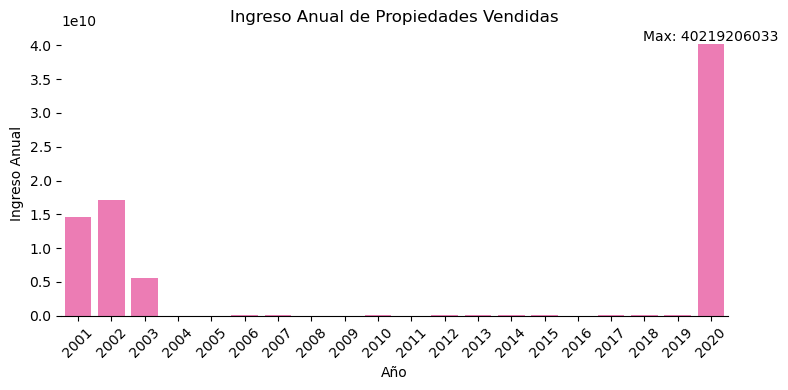

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ventas_br['saleAmount'] = pd.to_numeric(df_ventas_br['saleAmount'], errors='coerce')
ingreso_anual = df_ventas_br.groupby('listYear')['saleAmount'].sum()

plt.figure(figsize=(8, 4)) 
ax = sns.barplot(x=ingreso_anual.index, y=ingreso_anual.values, color='hotpink')
plt.xlabel('Año')
plt.ylabel('Ingreso Anual')
plt.title('Ingreso Anual de Propiedades Vendidas')
plt.xticks(rotation=45) 
año_max_ingreso = ingreso_anual.idxmax()
ingreso_maximo = ingreso_anual.max()
index_max = ingreso_anual.index.get_loc(año_max_ingreso)
ax.text(index_max, ingreso_maximo + 10000, f'Max: {ingreso_maximo:.0f}', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout() 
plt.show()




<p>  Pregunta 2: ¿Qué tipo de propiedad tiene mayor facilidad de venta? </p>
<p> De acuerdo a la data recopilada el tipo de propiedad que tiene mayor facilidad de venta es Residencial, seguida de Vacant Land y Cpmmercial</p>

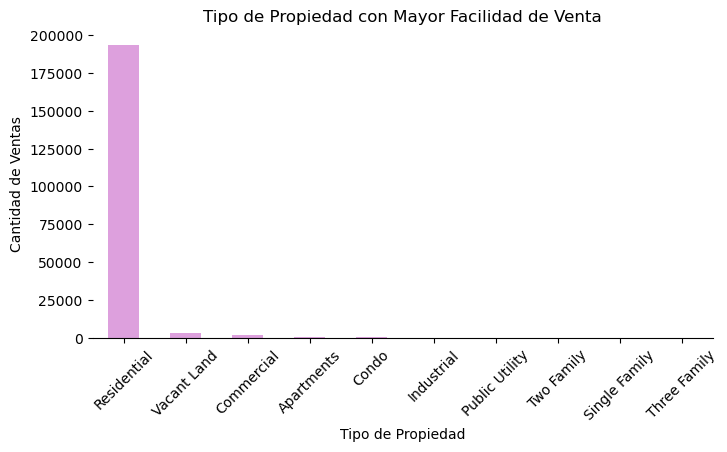

In [72]:
propiedad_facil_venta = df_ventas_br['propertyType'].value_counts()

plt.figure(figsize=(8, 4))
propiedad_facil_venta.plot(kind='bar', color='plum')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad de Ventas')
plt.title('Tipo de Propiedad con Mayor Facilidad de Venta')
plt.xticks(rotation=45)
plt.show()

<p>  Pregunta 3: ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? Y ¿Qué elementos particulares tienen esas ciudades o pueblos? </p>
<p>  Stamford es la ciudad donde se dan la mayor cantidad de ventas de propiedad , siendo en su mayoria propiedades tipo residencial y el tipo de residencia Single Family </p>

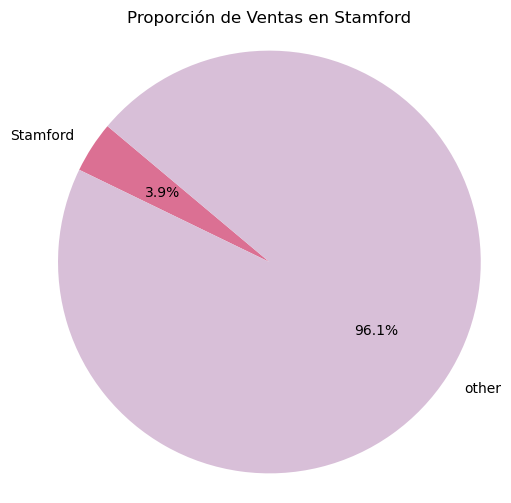

In [51]:
ciudad_con_mas_ventas = df_ventas_br['town'].value_counts().idxmax()
cantidad_ventas_ciudad = df_ventas_br['town'].value_counts().max()

total_ventas = len(df_ventas_br)

etiquetas = [ciudad_con_mas_ventas, 'other']
valores = [cantidad_ventas_ciudad, total_ventas - cantidad_ventas_ciudad]
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, colors=['palevioletred', 'thistle'], autopct='%1.1f%%', startangle=140)
plt.title(f'Proporción de Ventas en {ciudad_con_mas_ventas}')
plt.axis('equal') 
plt.show()

<p>  Pregunta 4: ¿Cuál es el costo promedio de las propiedades residenciales y comerciales? </p>
<p>  El costo promedio de las propiedades residenciales equivale a 346349.77 y el de las comerciales 1789659.37 </p>

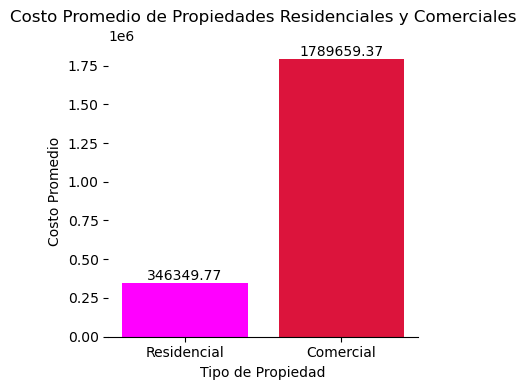

In [63]:
costo_promedio_residencial = df_ventas_br[df_ventas_br['propertyType'] == 'Residential']['saleAmount'].mean()
costo_promedio_comercial = df_ventas_br[df_ventas_br['propertyType'] == 'Commercial']['saleAmount'].mean()

plt.figure(figsize=(4, 4))
plt.bar(['Residencial', 'Comercial'], [costo_promedio_residencial, costo_promedio_comercial], color=['magenta', 'crimson'])
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Costo Promedio')
plt.title('Costo Promedio de Propiedades Residenciales y Comerciales')
for i, v in enumerate([costo_promedio_residencial, costo_promedio_comercial]):
    plt.text(i, v + 1000, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


<p>  Pregunta 5: ¿Cuál es tipo de propiedades residenciales que se vende con mayor frecuencia, donde y con que costo promedio?</p>
<p> El tipo de propiedad resindencial mas vendida corresponde a Single Family, con un costo promedio de 341874.83 dolares(asumiendo que dolares es el tipo de moneda)</p

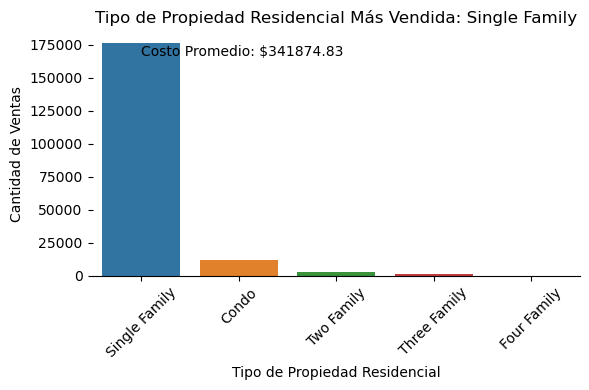

In [66]:
tipo_residencial_mas_vendida = df_ventas_br[df_ventas_br['propertyType'] == 'Residential']['residentialType'].value_counts().idxmax()
costo_promedio_residencial_mas_vendida = df_ventas_br[(df_ventas_br['propertyType'] == 'Residential') & (df_ventas_br['residentialType'] == tipo_residencial_mas_vendida)]['saleAmount'].mean()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_ventas_br[df_ventas_br['propertyType'] == 'Residential'], x='residentialType', order=df_ventas_br['residentialType'].value_counts().index)
plt.xlabel('Tipo de Propiedad Residencial')
plt.ylabel('Cantidad de Ventas')
plt.title(f'Tipo de Propiedad Residencial Más Vendida: {tipo_residencial_mas_vendida}')

plt.text(0, plt.gca().get_ylim()[1] * 0.9, f'Costo Promedio: ${costo_promedio_residencial_mas_vendida:.2f}', ha='left', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<p>  Pregunta 6:¿Cuál es margen promedio de ganancia por cada una de las propiedades vendidas? </p>
<p>  La media de la ganancia corresponde a 171073 dolares por cada propiedad vendida </p>

In [67]:
df_ventas_br['margen_ganancia'] = df_ventas_br['saleAmount'] - df_ventas_br['assessedValue']
margen_promedio = df_ventas_br['margen_ganancia'].mean()

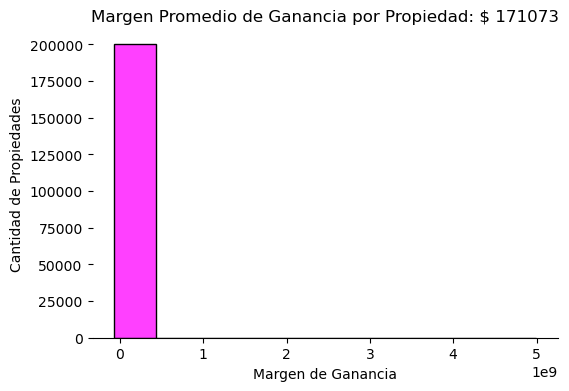

In [70]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_ventas_br, x='margen_ganancia', bins=10, color='magenta')
plt.xlabel('Margen de Ganancia')
plt.ylabel('Cantidad de Propiedades')
plt.title(f'Margen Promedio de Ganancia por Propiedad: $ {margen_promedio:.0f}')
plt.show()